# Grafting Process Visualisations

In [1]:
import os
os.chdir('../')
import torch
import numpy as np
import matplotlib.pyplot as plt

/usr/local/anaconda3/envs/alpha-beta-crown/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_results(name, checkpoint, best, ylim = [0,100]):
    for label, data in checkpoint['result'].items():
        plt.plot(range(1,(checkpoint['epoch'])+1), data, label = label)
    plt.title(name)
    plt.vlines(best['epoch'], ymax = 100, ymin = 0, label = f'Best RA: {best["best_ra"]:.2f}%', linestyles='dashed')
    plt.ylim(ylim)
    #plt.xlim(xlim)
    plt.xlabel("epoch")
    plt.legend()
    plt.show()

In [3]:
###### CNNB Grafted Results ########

results_dir_a = "CNN-B_CIFAR10/Graft/Models/Pretrained_with_weights/checkpoint.pth.tar"
best_ra_dir_a = "CNN-B_CIFAR10/Graft/Models/Pretrained_with_weights/model_RA_best.pth.tar"
name_a = "Grafted CNN-B with weight retraining, 50% Grafting"
results_a = torch.load(results_dir_a, map_location=torch.device('cpu'))
best_ra_a = torch.load(best_ra_dir_a, map_location=torch.device('cpu'))

results_dir_b = "CNN-B_CIFAR10/Graft/Models/Pretrained_no_weight_retraining/checkpoint.pth.tar"
best_ra_dir_b = "CNN-B_CIFAR10/Graft/Models/Pretrained_no_weight_retraining/model_RA_best.pth.tar"
name_b = "Grafted CNN-B without weight retraining, 50% Grafting"
results_b = torch.load(results_dir_b, map_location=torch.device('cpu'))
best_ra_b = torch.load(best_ra_dir_b, map_location=torch.device('cpu'))


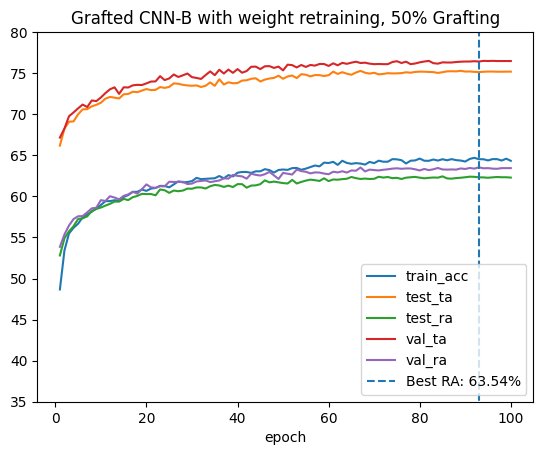

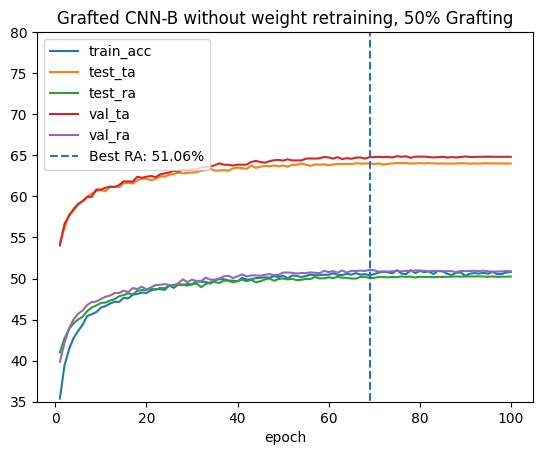

In [4]:
for name, checkpoint, best in zip([name_a, name_b],[results_a, results_b],[best_ra_a, best_ra_b]):
    plot_results(name, checkpoint, best, ylim = [35, 80])